In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
dados = pd.read_csv('netflix_titles.csv')
dados

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
dados.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
dados.director.fillna('Não informado', inplace=True)

In [5]:
dados.cast.fillna('Não informado', inplace=True)

In [6]:
dados.country.fillna('Não informado', inplace=True)

In [7]:
dados.date_added = dados.date_added.str.split(',').str[1]

In [8]:
dados.date_added.fillna(dados.date_added.mode()[0], inplace=True)

In [9]:
dados.rating.fillna(dados.rating.mode()[0], inplace=True)

In [10]:
dados.duration.fillna(dados.duration.mode()[0], inplace=True)

**Criação da Coluna 'Gênero'**

In [11]:
dados['genero'] = dados.listed_in.str.split(',').str[0]

**Distribuição de Filmes e Séries**

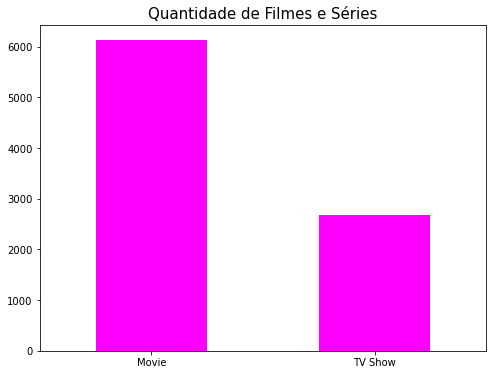

In [12]:
plt.figure(figsize=(8,6))
dados['type'].value_counts().plot(kind='bar', color='magenta')
plt.title('Quantidade de Filmes e Séries', size=15)
plt.xticks(rotation=0)
plt.show()

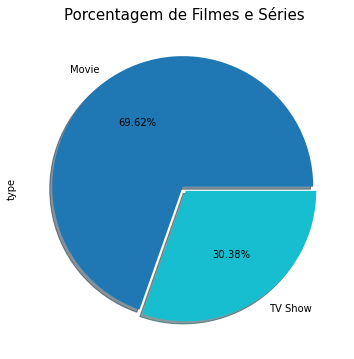

In [13]:
plt.figure(figsize=(8,6))
dados['type'].value_counts().plot(kind='pie', cmap='tab10', autopct='%1.2f%%', shadow=True, explode=[0.02,0.02])
plt.title('Porcentagem de Filmes e Séries', size=15)
plt.show()

**Gêneros mais comuns**

* Filmes

In [14]:
dados.loc[dados.type == 'Movie'].genero.value_counts()

Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
Children & Family Movies     605
Stand-Up Comedy              334
Horror Movies                275
International Movies         128
Classic Movies                80
Thrillers                     65
Movies                        57
Anime Features                21
Independent Movies            20
Music & Musicals              18
Sci-Fi & Fantasy              13
Cult Movies                   12
Romantic Movies                3
LGBTQ Movies                   1
Sports Movies                  1
Name: genero, dtype: int64

* Séries

In [15]:
dados.loc[dados.type == 'TV Show'].genero.value_counts()

International TV Shows          774
Crime TV Shows                  399
Kids' TV                        388
British TV Shows                253
Docuseries                      221
Anime Series                    176
TV Comedies                     120
Reality TV                      120
TV Dramas                        67
TV Action & Adventure            40
Stand-Up Comedy & Talk Shows     34
Romantic TV Shows                32
Classic & Cult TV                22
TV Shows                         16
TV Horror                        11
Spanish-Language TV Shows         2
TV Sci-Fi & Fantasy               1
Name: genero, dtype: int64

**Quantidade de conteúdo lançado por ano**

In [16]:
df = dados[['release_year', 'title']].groupby('release_year').count().sort_values(by='release_year', ascending=False)

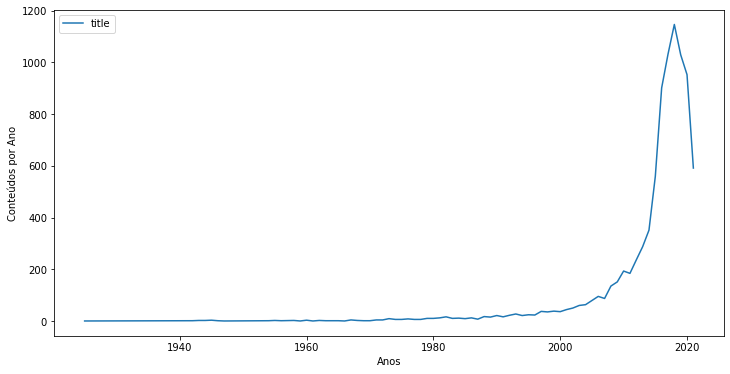

In [17]:
df.plot(figsize=(12,6), )
plt.xlabel('Anos')
plt.ylabel('Conteúdos por Ano')
plt.show()

**Distribuição da Classificação Etária**

In [24]:
valores = list(dados.rating.value_counts().values)
classificadores = list(dados.rating.value_counts().index)

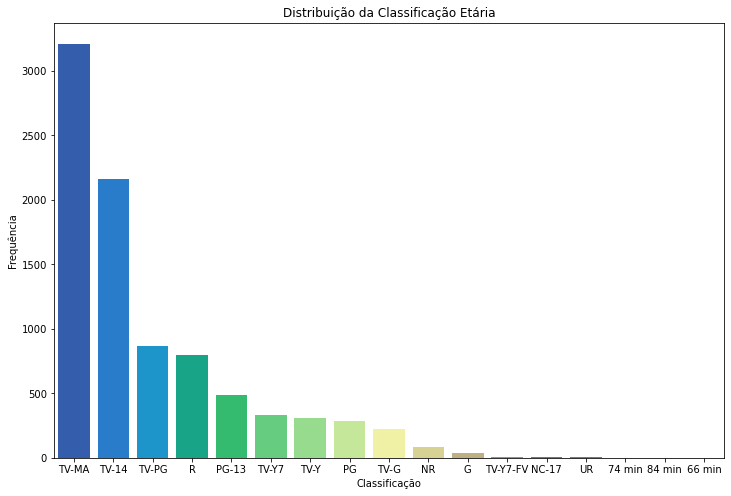

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=classificadores, y=valores, palette='terrain')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.title('Distribuição da Classificação Etária')
plt.show()

**Comparação entre as Classificações Etárias dos Filmes e Séries**

In [76]:
filmes = dados.loc[dados.type == 'Movie']
series = dados.loc[dados.type == 'TV Show']

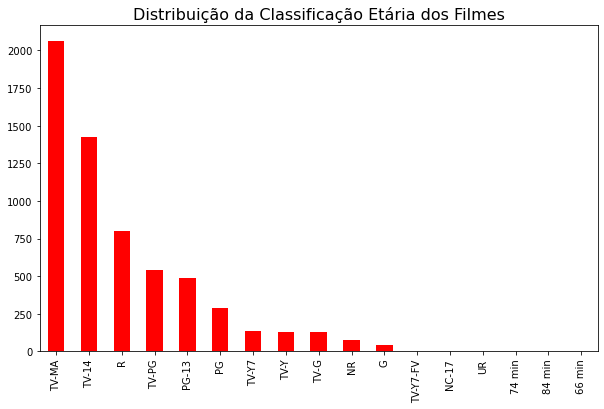

In [77]:
plt.figure(figsize=(10,6))
filmes.rating.value_counts().plot(kind='bar', cmap='prism')
plt.title('Distribuição da Classificação Etária dos Filmes', size=16)
plt.show()

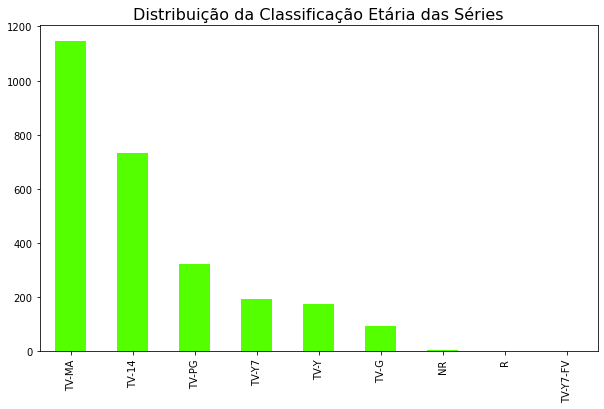

In [78]:
plt.figure(figsize=(10,6))
series.rating.value_counts().plot(kind='bar', cmap='prism_r')
plt.title('Distribuição da Classificação Etária das Séries', size=16)
plt.show()

**Análise da Duração dos Conteúdos**

* Filmes

In [79]:
filmes['duration'] = filmes['duration'].str.split().str[0].astype(int)

In [103]:
filmes['duration'].describe()

count    6131.000000
mean       99.528951
std        28.367576
min         1.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

* Séries

In [98]:
series['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [104]:
series[series.duration == '17 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genero
548,s549,TV Show,Grey's Anatomy,Não informado,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,Romantic TV Shows


**Quantidade de contéudo produzido por país**

* Filmes

In [115]:
contagem_filmes = list(filmes['country'].value_counts().head(10).values)

In [116]:
paises_filmes = list(filmes['country'].value_counts().head(10).index)

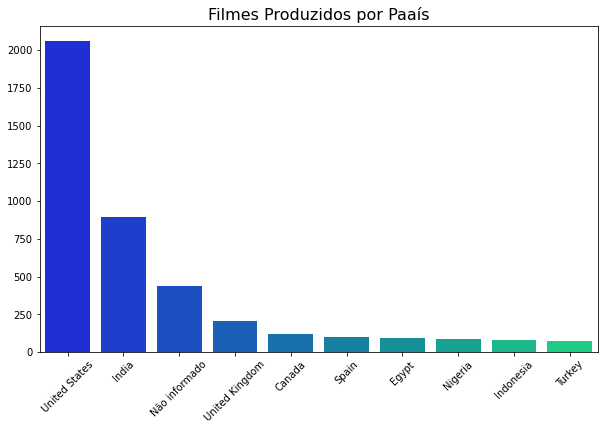

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(x=paises_filmes, y=contagem_filmes, palette='winter')
plt.xticks(rotation=45)
plt.title('Filmes Produzidos por Paaís', size=16)
plt.show()

* Séries

In [137]:
cont_series = list(series['country'].value_counts().head(10).values)

In [138]:
paises_series = list(series['country'].value_counts().head(10).index)

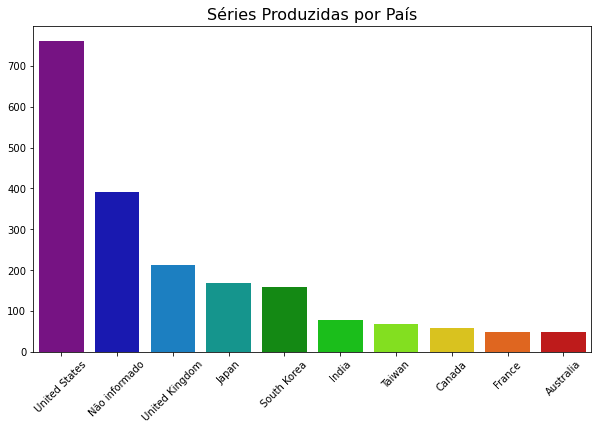

In [147]:
plt.figure(figsize=(10,6))
sns.barplot(x=paises_series, y=cont_series, palette='nipy_spectral')
plt.xticks(rotation=45)
plt.title('Séries Produzidas por País', size=16)
plt.show()

**Criando coluna 'Ator Principal'**

In [162]:
dados['ator_principal'] = dados['cast'].str.split(',').str[0]

**Analisando os 10 atores principais com mais trabalhos**

In [180]:
atores = dados['ator_principal'].value_counts()[1:].head(10).index
vezes = dados['ator_principal'].value_counts()[1:].head(10).values

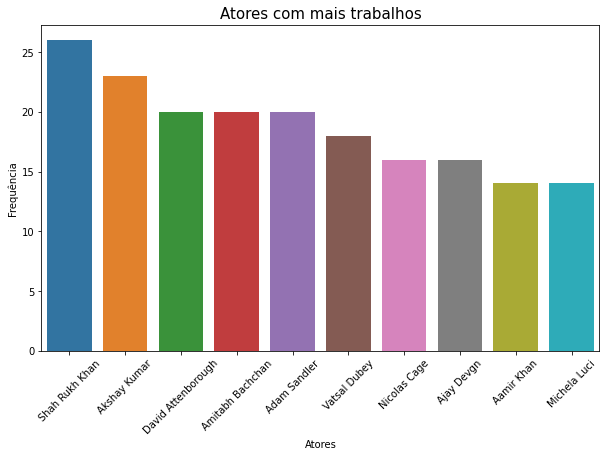

In [184]:
plt.figure(figsize=(10,6))
sns.barplot(x=atores, y=vezes)
plt.xticks(rotation=45)
plt.xlabel('Atores')
plt.ylabel('Frequência')
plt.title('Atores com mais trabalhos', size=15)
plt.show()

**Analisando os diretores com mais trabalhos**

In [202]:
diretores = dados.director.value_counts()[1:].head(20).index
trabalhos = dados.director.value_counts()[1:].head(20).values

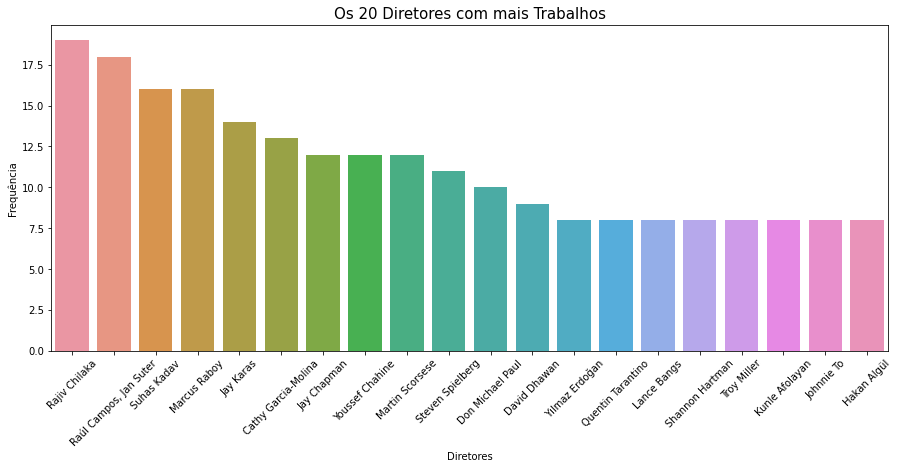

In [206]:
plt.figure(figsize=(15,6))
sns.barplot(x=diretores, y=trabalhos)
plt.title('Os 20 Diretores com mais Trabalhos', size=15)
plt.xticks(rotation=45)
plt.xlabel('Diretores')
plt.ylabel('Frequência')
plt.show()